In [3]:
import pandas as pd
# Read the CSV file into a DataFrame
df = pd.read_csv('Thesisdataset.csv', parse_dates=['UTC'], date_format='%Y-%m-%d %H:%M:%S%z')

# Set 'UTC' column as the index
df.set_index('UTC', inplace=True)

# Display the first and last few rows of the DataFrame
print(df.head())
print(df.tail())

# Get a summary of the DataFrame
df.info()

                                 pID            Prd   PrdNorm         Irr
UTC                                                                      
2023-04-13 11:00:00+00:00  Bisceglie  780930.530000  0.791461  917.055833
2023-04-13 12:00:00+00:00  Bisceglie  743441.672500  0.753484  872.392333
2023-04-13 13:00:00+00:00  Bisceglie  578979.020833  0.586780  670.299333
2023-04-13 14:00:00+00:00  Bisceglie  415189.573333  0.420821  478.413500
2023-04-13 15:00:00+00:00  Bisceglie  530802.923333  0.537957  605.063667
                             pID         Prd  PrdNorm       Irr
UTC                                                            
2024-06-19 19:00:00+00:00  Celso  27114.7325  0.00452  5.538500
2024-06-19 20:00:00+00:00  Celso      0.0000  0.00000  0.338333
2024-06-19 21:00:00+00:00  Celso      0.0000  0.00000  0.320833
2024-06-19 22:00:00+00:00  Celso      0.0000  0.00000  0.307000
2024-06-19 23:00:00+00:00  Celso      0.0000  0.00000  0.294500
<class 'pandas.core.frame.DataFram

In [4]:
# Get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56007 entries, 2023-04-13 11:00:00+00:00 to 2024-06-19 23:00:00+00:00
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pID      56007 non-null  object 
 1   Prd      56007 non-null  float64
 2   PrdNorm  56007 non-null  float64
 3   Irr      56007 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.1+ MB


In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handle missing values for numeric columns
numeric_columns = ['Prd', 'PrdNorm', 'Irr']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Verify there are no more missing values
print(df.isnull().sum())

pID        0
Prd        0
PrdNorm    0
Irr        0
dtype: int64
pID        0
Prd        0
PrdNorm    0
Irr        0
dtype: int64


In [6]:
# Verify data types
print(df.dtypes)

# Ensure all data types are as expected, for example, prd and Irr should be float
df['Prd'] = df['Prd'].astype(float)
df['Irr'] = df['Irr'].astype(float)
df['PrdNorm'] = df['PrdNorm'].astype(float)

# Verify the changes
print(df.dtypes)


pID         object
Prd        float64
PrdNorm    float64
Irr        float64
dtype: object
pID         object
Prd        float64
PrdNorm    float64
Irr        float64
dtype: object


In [7]:
# Verify the normalization
print(df['PrdNorm'].describe())

count    56007.000000
mean         0.162691
std          0.245157
min          0.000000
25%          0.000000
50%          0.000486
75%          0.290100
max          0.898216
Name: PrdNorm, dtype: float64


In [8]:
# Resample the data to daily production and irradiation
daily_df = df.resample('D').sum()

# Display the first few rows of the resampled DataFrame
print(daily_df.head())


                                                                         pID  \
UTC                                                                            
2023-04-13 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-14 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-15 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-16 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   
2023-04-17 00:00:00+00:00  BisceglieOrtonaMolinoCasilloTTBisceglieOrtonaM...   

                                    Prd   PrdNorm          Irr  
UTC                                                             
2023-04-13 00:00:00+00:00  2.000873e+07  7.483768  8745.116870  
2023-04-14 00:00:00+00:00  2.737290e+07  6.198623  7305.307037  
2023-04-15 00:00:00+00:00  2.239684e+07  8.372315  9376.017170  
2023-04-16 00:00:00+00:00  1.527575e+07  6.041580  6571.661265  
2023-04-17 00:00:00+00:00  1.045721e+07  3.385164

In [9]:
# Generate descriptive statistics
daily_stats = daily_df.describe()
print(daily_stats)


                Prd     PrdNorm           Irr
count  4.340000e+02  434.000000    434.000000
mean   6.049409e+07   20.995030  25190.618963
std    3.167005e+07    9.611651  11863.851007
min    0.000000e+00    0.000000      0.000000
25%    3.726667e+07   12.985842  15604.705024
50%    5.625551e+07   20.953532  24682.439795
75%    7.993752e+07   27.567742  32963.240674
max    1.696259e+08   50.245950  61883.108917


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


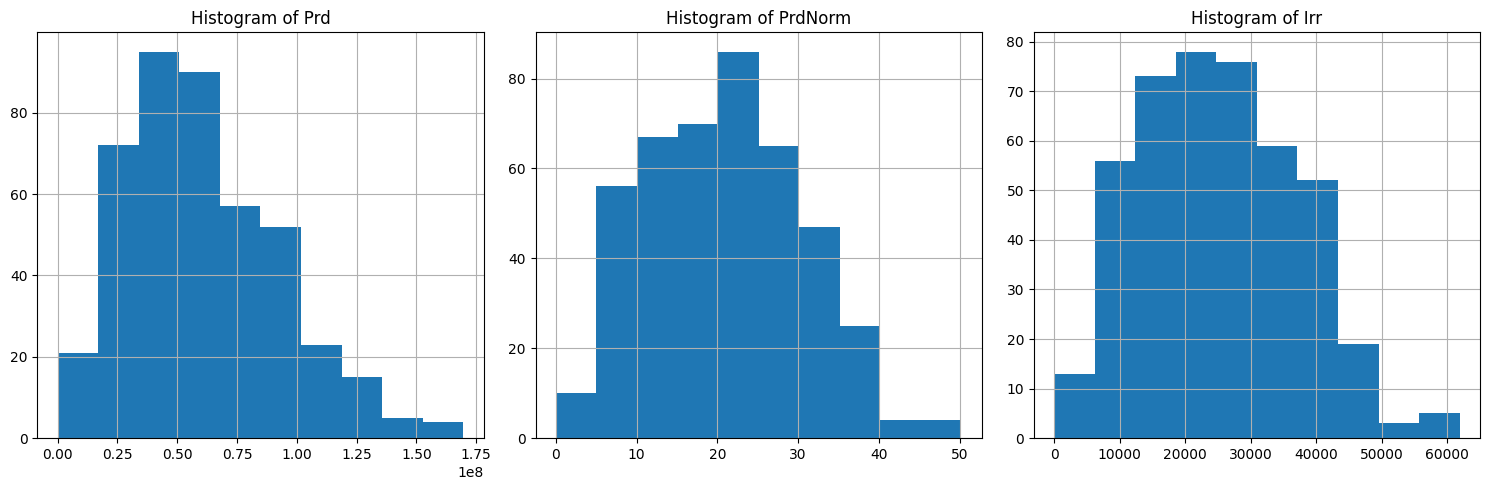

In [11]:
# Univariate Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
daily_df['Prd'].hist(ax=axes[0])
axes[0].set_title('Histogram of Prd')
daily_df['PrdNorm'].hist(ax=axes[1])
axes[1].set_title('Histogram of PrdNorm')
daily_df['Irr'].hist(ax=axes[2])
axes[2].set_title('Histogram of Irr')
plt.tight_layout()
plt.show()

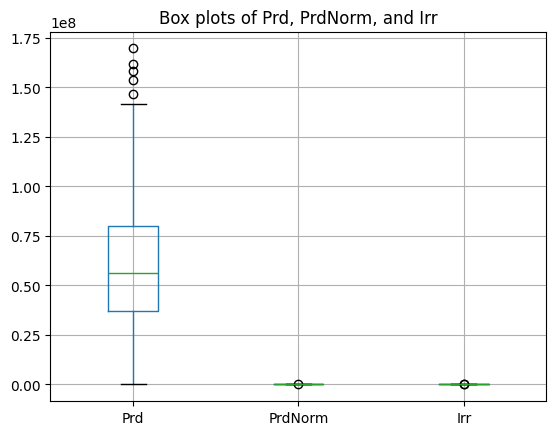

In [12]:
daily_df.boxplot(column=['Prd', 'PrdNorm', 'Irr'])
plt.title('Box plots of Prd, PrdNorm, and Irr')
plt.show()

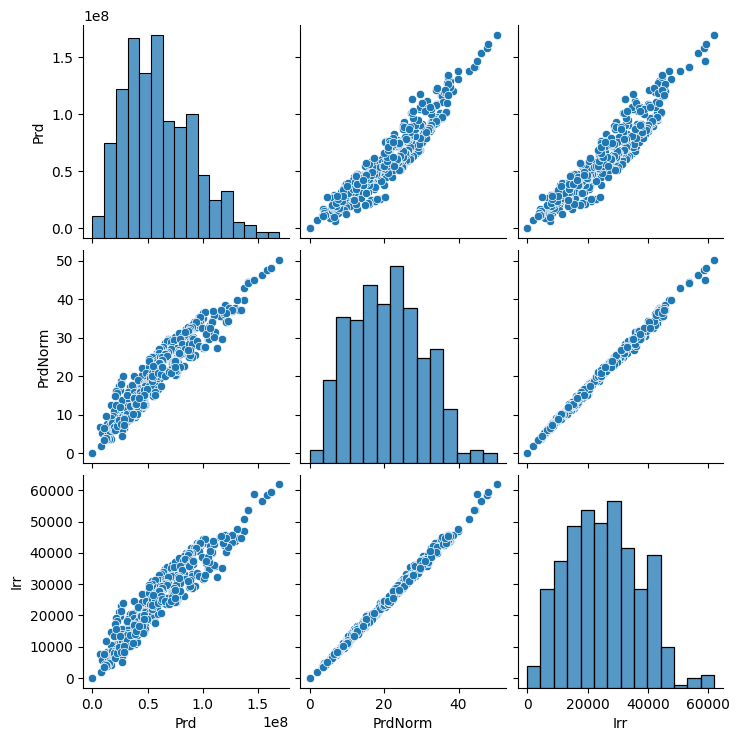

In [13]:
# Bivariate Analysis
sns.pairplot(daily_df[['Prd', 'PrdNorm', 'Irr']])
plt.show()

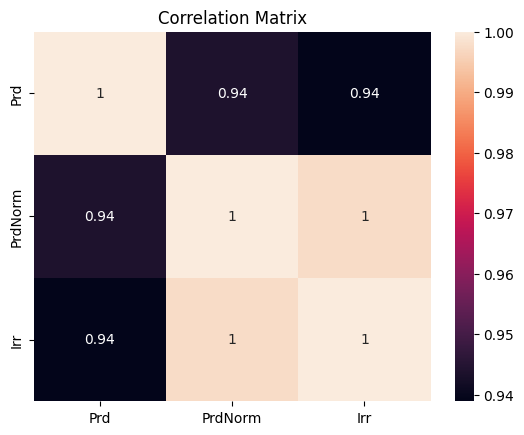

In [14]:
# Correlation Matrix
corr_matrix = daily_df[['Prd', 'PrdNorm', 'Irr']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

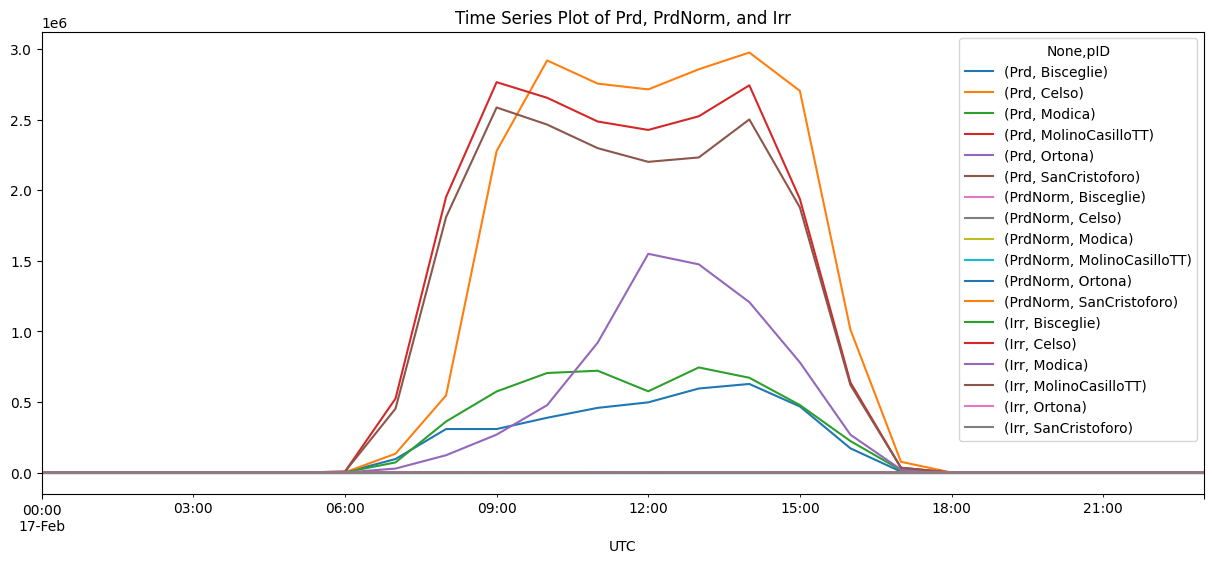

In [15]:
# Time Series Analysis
df.set_index('pID', append=True).unstack(level=1).sort_index().loc['2024-02-17'][['Prd', 'PrdNorm', 'Irr']].plot(figsize=(15, 6))

plt.title('Time Series Plot of Prd, PrdNorm, and Irr')
plt.show()


In [16]:
df.set_index('pID', append=True).unstack(level=1)

Prd                                       \
pID                            Bisceglie       Celso   Modica MolinoCasilloTT   
UTC                                                                             
2023-04-13 11:00:00+00:00  780930.530000         NaN      NaN    3.167157e+06   
2023-04-13 12:00:00+00:00  743441.672500         NaN      NaN    3.112100e+06   
2023-04-13 13:00:00+00:00  578979.020833         NaN      NaN    3.126391e+06   
2023-04-13 14:00:00+00:00  415189.573333         NaN      NaN    2.061898e+06   
2023-04-13 15:00:00+00:00  530802.923333         NaN      NaN    2.355887e+06   
...                                  ...         ...      ...             ...   
2024-06-19 19:00:00+00:00    2787.246667  27114.7325  1416.39    1.169771e+04   
2024-06-19 20:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 21:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 22:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   
2024-06-19 23:00:00+00:00       0.000000      0.0000     0.00    0.000000e+00   

                                                        PrdNorm           \
pID                              Ortona SanCristoforo Bisceglie    Celso   
UTC                                                                        
2023-04-13 11:00:00+00:00      0.000000           NaN  0.791461      NaN   
2023-04-13 12:00:00+00:00      0.000000           NaN  0.753484      NaN   
2023-04-13 13:00:00+00:00      0.000000           NaN  0.586780      NaN   
2023-04-13 14:00:00+00:00      0.000000           NaN  0.420821      NaN   
2023-04-13 15:00:00+00:00      0.000000           NaN  0.537957      NaN   
...                                 ...           ...       ...      ...   
2024-06-19 19:00:00+00:00  13733.264167  15361.586667  0.002817  0.00452   
2024-06-19 20:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 21:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 22:00:00+00:00      0.000000      0.000000  0.000000  0.00000   
2024-06-19 23:00:00+00:00      0.000000      0.000000  0.000000  0.00000   

                                                                             \
pID                          Modica MolinoCasilloTT    Ortona SanCristoforo   
UTC                                                                           
2023-04-13 11:00:00+00:00       NaN        0.712887  0.000000           NaN   
2023-04-13 12:00:00+00:00       NaN        0.700477  0.000000           NaN   
2023-04-13 13:00:00+00:00       NaN        0.703715  0.000000           NaN   
2023-04-13 14:00:00+00:00       NaN        0.464113  0.000000           NaN   
2023-04-13 15:00:00+00:00       NaN        0.530251  0.000000           NaN   
...                             ...             ...       ...           ...   
2024-06-19 19:00:00+00:00  0.001419        0.002632  0.006091      0.003179   
2024-06-19 20:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 21:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 22:00:00+00:00  0.000000        0.000000  0.000000      0.000000   
2024-06-19 23:00:00+00:00  0.000000        0.000000  0.000000      0.000000   

                                  Irr                                      \
pID                         Bisceglie     Celso    Modica MolinoCasilloTT   
UTC                                                                         
2023-04-13 11:00:00+00:00  917.055833       NaN       NaN      809.252296   
2023-04-13 12:00:00+00:00  872.392333       NaN       NaN      798.701926   
2023-04-13 13:00:00+00:00  670.299333       NaN       NaN      821.734370   
2023-04-13 14:00:00+00:00  478.413500       NaN       NaN      520.583704   
2023-04-13 15:00:00+00:00  605.063667       NaN       NaN      614.145926   
...                               ...       ...       ...             ...   
2024-06-19 19:00:00+00:00    2.980667

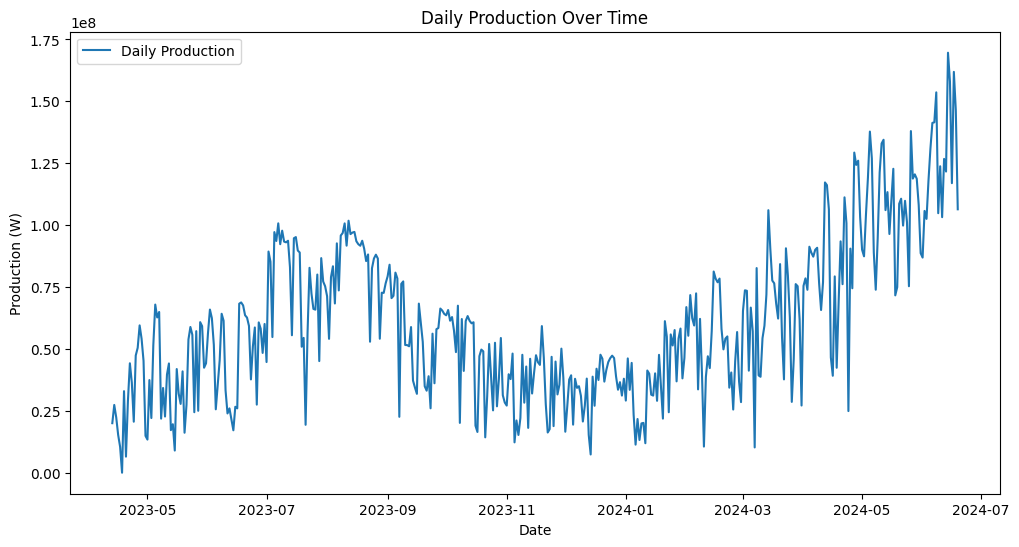

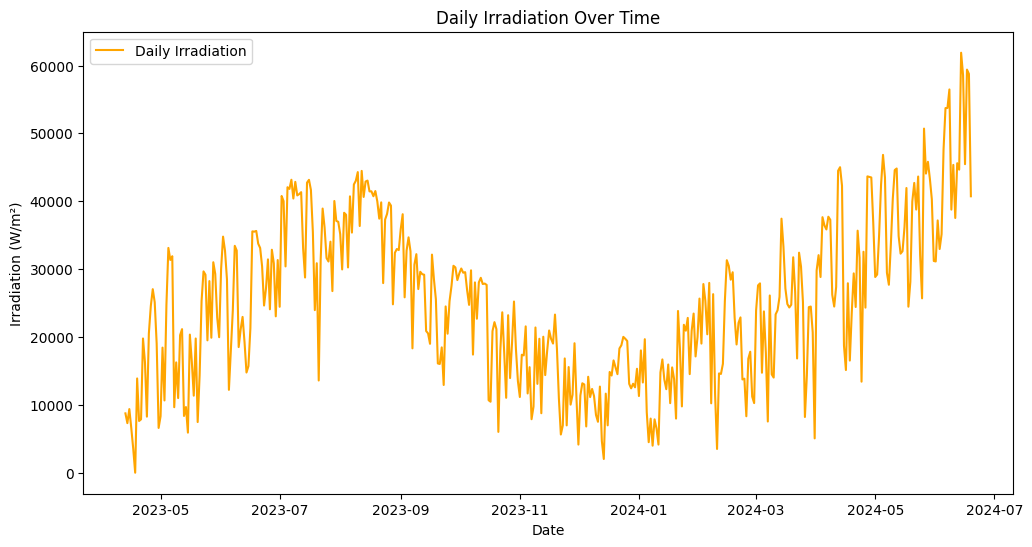

In [17]:
import matplotlib.pyplot as plt

# Plot daily production
plt.figure(figsize=(12, 6))
plt.plot(daily_df.index, daily_df['Prd'], label='Daily Production')
plt.title('Daily Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production (W)')
plt.legend()
plt.show()

# Plot daily irradiation
plt.figure(figsize=(12, 6))
plt.plot(daily_df.index, daily_df['Irr'], label='Daily Irradiation', color='orange')
plt.title('Daily Irradiation Over Time')
plt.xlabel('Date')
plt.ylabel('Irradiation (W/m²)')
plt.legend()
plt.show()


In [18]:
import numpy as np

# Creating cyclical features
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek

# Transforming the features using sine and cosine
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

df['day_sin'] = np.sin(2 * np.pi * df['day'] / 31)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 31)

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

df['dayofweek_sin'] = np.sin(2 * np.pi * df['dayofweek'] / 7)
df['dayofweek_cos'] = np.cos(2 * np.pi * df['dayofweek'] / 7)

# Dropping the original columns used for transformation
df.drop(columns=['hour', 'day', 'month', 'dayofweek'], inplace=True)


In [19]:
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df[['Irr', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'dayofweek_sin', 'dayofweek_cos']]
y = df['PrdNorm']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
X_train.shape

(44805, 9)

In [21]:
y_train.shape

(44805,)

In [22]:
df

,pID,Prd,PrdNorm,Irr,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,dayofweek_sin,dayofweek_cos
UTC,,,,,,,,,,,,
2023-04-13 11:00:00+00:00,Bisceglie,780930.530000,0.791461,917.055833,2.588190e-01,-0.965926,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 12:00:00+00:00,Bisceglie,743441.672500,0.753484,872.392333,1.224647e-16,-1.000000,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 13:00:00+00:00,Bisceglie,578979.020833,0.586780,670.299333,-2.588190e-01,-0.965926,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 14:00:00+00:00,Bisceglie,415189.573333,0.420821,478.413500,-5.000000e-01,-0.866025,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
2023-04-13 15:00:00+00:00,Bisceglie,530802.923333,0.537957,605.063667,-7.071068e-01,-0.707107,0.485302,-0.874347,8.660254e-01,-0.5,0.433884,-0.900969
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-19 19:00:00+00:00,Celso,27114.732500,0.004520,5.538500,-9.659258e-01,0.258819,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 20:00:00+00:00,Celso,0.000000,0.000000,0.338333,-8.660254e-01,0.500000,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 21:00:00+00:00,Celso,0.000000,0.000000,0.320833,-7.071068e-01,0.707107,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521


In [23]:
df.loc['2024-06-19 23:00:00+00:00']

,pID,Prd,PrdNorm,Irr,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,dayofweek_sin,dayofweek_cos
UTC,,,,,,,,,,,,
2024-06-19 23:00:00+00:00,Bisceglie,0.0,0.0,0.016833,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Modica,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Ortona,0.0,0.0,0.541000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,SanCristoforo,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,MolinoCasilloTT,0.0,0.0,0.000000,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521
2024-06-19 23:00:00+00:00,Celso,0.0,0.0,0.294500,-0.258819,0.965926,-0.651372,-0.758758,1.224647e-16,-1.0,0.974928,-0.222521


In [24]:
from sklearn.metrics import mean_absolute_error
import numpy as np


# MAPE

In [25]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error (MAPE)"""
    # Remove zeros from y_true to avoid division by zero
    non_zero_indices = y_true != 0
    y_true_non_zero = y_true[non_zero_indices]
    y_pred_non_zero = y_pred[non_zero_indices]
    
    # Add a small constant to avoid division by very small values
    y_true_non_zero = np.where(y_true_non_zero == 0, 1e-5, y_true_non_zero)

    # Calculate MAPE
    mape = np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / y_true_non_zero) * 100)
    return mape

def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    """Calculate Symmetric Mean Absolute Percentage Error (SMAPE)"""
    # Remove zeros from y_true and y_pred to avoid division by zero
    non_zero_indices = (y_true != 0) | (y_pred != 0)  # Include non-zero predictions too
    y_true_non_zero = y_true[non_zero_indices]
    y_pred_non_zero = y_pred[non_zero_indices]
    
    # Calculate SMAPE
    smape = np.mean(np.abs(y_true_non_zero - y_pred_non_zero) / 
                    ((np.abs(y_true_non_zero) + np.abs(y_pred_non_zero)) / 2) * 100)
    return smape

def mean_bias_error(y_true, y_pred):
    """Calculate Mean Bias Error (MBE)"""
    mbe = np.mean(y_pred - y_true)
    return mbe

def mean_absolute_error(y_true, y_pred):
    """Calculate Mean Absolute Error (MAE)"""
    mae = np.mean(np.abs(y_pred - y_true))
    return mae

def root_mean_squared_error(y_true, y_pred):
    """Calculate Root Mean Squared Error (RMSE)"""
    rmse = np.sqrt(np.mean((y_pred - y_true) ** 2))
    return rmse

def r_squared(y_true, y_pred):
    """Calculate R²"""
    ss_res = np.sum((y_true - y_pred) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    r2 = 1 - (ss_res / ss_tot)
    return r2



In [26]:
# Assuming 'Prd' is your y_true column
# First, create a mask to filter out zeros in 'Prd'
non_zero_mask = df['Prd'] != 0

# Apply the mask to the DataFrame to create a new DataFrame without zeros
df_non_zero = df[non_zero_mask]

# Count the number of zeros in the original DataFrame
zero_count_original = (df['Prd'] == 0).sum()

# Count the number of zeros in the non-zero DataFrame
zero_count_after_removal = (df_non_zero['Prd'] == 0).sum()

# Print the results
print(f"Number of zeros in the original dataset: {zero_count_original}")
print(f"Number of zeros in the dataset after removal: {zero_count_after_removal}")


Number of zeros in the original dataset: 26875
Number of zeros in the dataset after removal: 0


# RF

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using the pre-defined metrics
mape_value = mean_absolute_percentage_error(y_test.values, y_pred)
smape_value = symmetric_mean_absolute_percentage_error(y_test.values, y_pred)
mbe_value = mean_bias_error(y_test.values, y_pred)
mae_value = mean_absolute_error(y_test.values, y_pred)
rmse_value = root_mean_squared_error(y_test.values, y_pred)
r2_value = r_squared(y_test.values, y_pred)

# Print the results
print(f"MAPE: {mape_value:.2f}%")
print(f"SMAPE: {smape_value:.2f}%")
print(f"MBE: {mbe_value:.2f}")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")
print(f"R²: {r2_value:.2f}")


MAPE: 51.08%
SMAPE: 36.27%
MBE: -0.00
MAE: 0.01
RMSE: 0.02
R²: 0.99


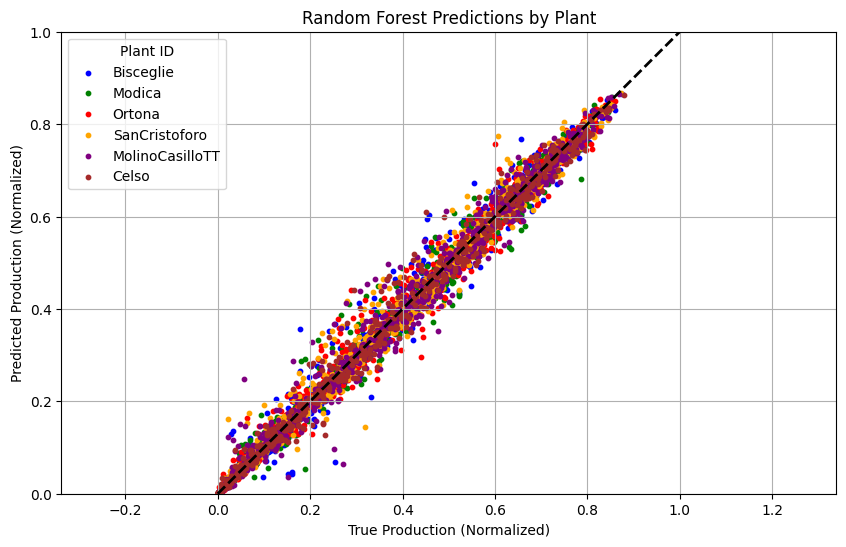

In [28]:
import matplotlib.pyplot as plt

# Reset index for X_test and y_test to ensure they align
X_test_with_pID = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Convert y_pred to a pandas Series if it's a NumPy array
if isinstance(y_pred, np.ndarray):
    y_pred = pd.Series(y_pred)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Define colors for each plant
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred[plant_mask].values, s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('Random Forest Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)  # Optional: add grid for better visibility
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Optional: diagonal line for reference
plt.axis('equal')  # Optional: make axes equal for better visual comparison
plt.xlim(0, 1)  # Adjust limits based on your normalized data range
plt.ylim(0, 1)  # Adjust limits based on your normalized data range
plt.show()


In [29]:
print("Maximum predicted production (Normalized):", y_pred.max())


Maximum predicted production (Normalized): 0.8678254219227065


# xgboost

In [30]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import xgboost as xgb

# Define the XGBoost model
xgb_model = xgb.XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model using the pre-defined metrics
mape_value_xgb = mean_absolute_percentage_error(y_test.values, y_pred_xgb)
smape_value_xgb = symmetric_mean_absolute_percentage_error(y_test.values, y_pred_xgb)
mbe_value_xgb = mean_bias_error(y_test.values, y_pred_xgb)
mae_value_xgb = mean_absolute_error(y_test.values, y_pred_xgb)
rmse_value_xgb = root_mean_squared_error(y_test.values, y_pred_xgb)
r2_value_xgb = r_squared(y_test.values, y_pred_xgb)

# Print the results
print(f"MAPE: {mape_value_xgb:.2f}%")
print(f"SMAPE: {smape_value_xgb:.2f}%")
print(f"MBE: {mbe_value_xgb:.2f}")
print(f"MAE: {mae_value_xgb:.2f}")
print(f"RMSE: {rmse_value_xgb:.2f}")
print(f"R²: {r2_value_xgb:.2f}")

MAPE: 843.93%
SMAPE: 104.07%
MBE: -0.00
MAE: 0.01
RMSE: 0.02
R²: 0.99


In [32]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7, 9],         # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'subsample': [0.6, 0.8, 1.0],      # Fraction of samples used for fitting
    'colsample_bytree': [0.6, 0.8, 1.0] # Fraction of features used for each tree
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_absolute_error',  # Use MAE as the scoring metric
                           cv=3,  # 3-fold cross-validation
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model with the best parameters
xgb_model_best = xgb.XGBRegressor(**best_params, random_state=42)
xgb_model_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb_best = xgb_model_best.predict(X_test)

# Evaluate the model using the pre-defined metrics
mape_value_xgb_best = mean_absolute_percentage_error(y_test.values, y_pred_xgb_best)
smape_value_xgb_best = symmetric_mean_absolute_percentage_error(y_test.values, y_pred_xgb_best)
mbe_value_xgb_best = mean_bias_error(y_test.values, y_pred_xgb_best)
mae_value_xgb_best = mean_absolute_error(y_test.values, y_pred_xgb_best)
rmse_value_xgb_best = root_mean_squared_error(y_test.values, y_pred_xgb_best)
r2_value_xgb_best = r_squared(y_test.values, y_pred_xgb_best)

# Print the results
print(f"XGBoost Model with Best Parameters Metrics:")
print(f"MAPE: {mape_value_xgb_best:.2f}%")
print(f"SMAPE: {smape_value_xgb_best:.2f}%")
print(f"MBE: {mbe_value_xgb_best:.2f}")
print(f"MAE: {mae_value_xgb_best:.2f}")
print(f"RMSE: {rmse_value_xgb_best:.2f}")
print(f"R²: {r2_value_xgb_best:.2f}")


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.3s
[CV] END 

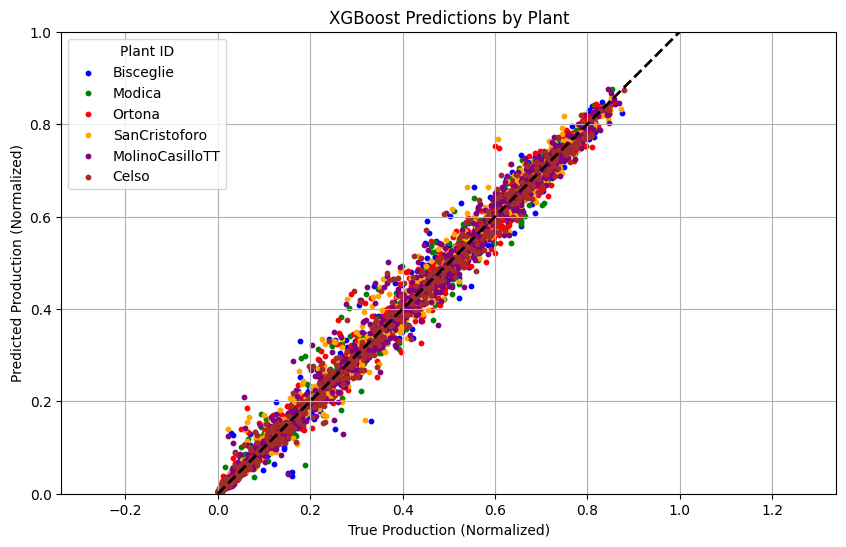

In [33]:
import matplotlib.pyplot as plt

# Reset index for X_test and y_test to ensure they align
X_test_with_pID = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Convert y_pred_xgb to a pandas Series if it's a NumPy array
if isinstance(y_pred_xgb_best, np.ndarray):
    y_pred_xgb_best = pd.Series(y_pred_xgb_best)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Define colors for each plant
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred_xgb_best[plant_mask].values, 
                s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('XGBoost Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)  # Optional: add grid for better visibility
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Optional: diagonal line for reference
plt.axis('equal')  # Optional: make axes equal for better visual comparison
plt.xlim(0, 1)  # Adjust limits based on your normalized data range
plt.ylim(0, 1)  # Adjust limits based on your normalized data range
plt.show()


# SVR

In [34]:
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt

# Define the SVR model (you can tune hyperparameters like kernel, C, and epsilon)
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = svr_model.predict(X_test)

# Evaluate the model using the pre-defined metrics
mape_value_svr = mean_absolute_percentage_error(y_test.values, y_pred_svr)
smape_value_svr = symmetric_mean_absolute_percentage_error(y_test.values, y_pred_svr)
mbe_value_svr = mean_bias_error(y_test.values, y_pred_svr)
mae_value_svr = mean_absolute_error(y_test.values, y_pred_svr)
rmse_value_svr = root_mean_squared_error(y_test.values, y_pred_svr)
r2_value_svr = r_squared(y_test.values, y_pred_svr)

# Print the results
print(f"SVR MAPE: {mape_value_svr:.2f}%")
print(f"SVR SMAPE: {smape_value_svr:.2f}%")
print(f"SVR MBE: {mbe_value_svr:.2f}")
print(f"SVR MAE: {mae_value_svr:.2f}")
print(f"SVR RMSE: {rmse_value_svr:.2f}")
print(f"SVR R²: {r2_value_svr:.2f}")

SVR MAPE: 199310.56%
SVR SMAPE: 120.53%
SVR MBE: 0.02
SVR MAE: 0.05
SVR RMSE: 0.05
SVR R²: 0.96


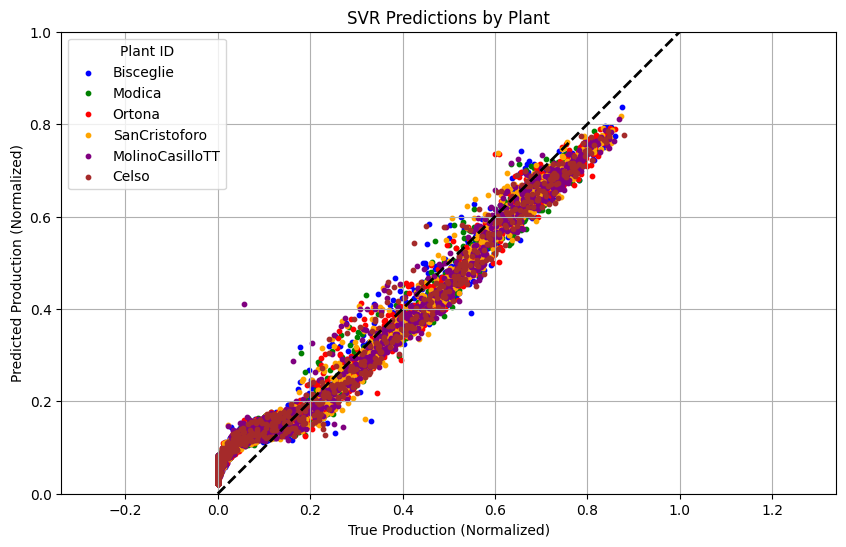

In [35]:
# Visualizing the predictions
# Reset index for X_test and y_test to ensure they align
X_test_with_pID_svr = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Convert y_pred to a pandas Series if it's a NumPy array
if isinstance(y_pred_svr, np.ndarray):
    y_pred_svr = pd.Series(y_pred_svr)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID_svr['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Create a scatter plot for SVR predictions
plt.figure(figsize=(10, 6))

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID_svr['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred_svr[plant_mask].values, s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('SVR Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference
plt.axis('equal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [36]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import GridSearchCV

# # Scale the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'C': [1, 10, 100, 1000],
#     'epsilon': [0.01, 0.1, 0.5, 1.0],
#     'kernel': ['linear', 'poly', 'rbf']
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(SVR(), param_grid, scoring='neg_mean_absolute_error', cv=5)

# # Fit the model
# grid_search.fit(X_train_scaled, y_train)

# # Get the best estimator
# best_svr_model = grid_search.best_estimator_

# # Make predictions with the best model
# y_pred_svr = best_svr_model.predict(X_test_scaled)

# # Evaluate the model using your pre-defined metrics
# mape_value_svr = mean_absolute_percentage_error(y_test.values, y_pred_svr)
# smape_value_svr = symmetric_mean_absolute_percentage_error(y_test.values, y_pred_svr)
# mbe_value_svr = mean_bias_error(y_test.values, y_pred_svr)
# mae_value_svr = mean_absolute_error(y_test.values, y_pred_svr)
# rmse_value_svr = root_mean_squared_error(y_test.values, y_pred_svr)
# r2_value_svr = r_squared(y_test.values, y_pred_svr)

# # Print the results
# print(f"SVR MAPE: {mape_value_svr:.2f}%")
# print(f"SVR SMAPE: {smape_value_svr:.2f}%")
# print(f"SVR MBE: {mbe_value_svr:.2f}")
# print(f"SVR MAE: {mae_value_svr:.2f}")
# print(f"SVR RMSE: {rmse_value_svr:.2f}")
# print(f"SVR R²: {r2_value_svr:.2f}")


# SNN

Epoch 1/50
1121/1121 [==============================] - 1s 583us/step - loss: 2.4307 - val_loss: 7.4708e-04
Epoch 2/50
1121/1121 [==============================] - 1s 583us/step - loss: 7.0683e-04 - val_loss: 0.0030
Epoch 3/50
1121/1121 [==============================] - 1s 549us/step - loss: 0.0011 - val_loss: 6.2417e-04
Epoch 4/50
1121/1121 [==============================] - 1s 598us/step - loss: 0.0568 - val_loss: 0.8314
Epoch 5/50
1121/1121 [==============================] - 1s 571us/step - loss: 0.0045 - val_loss: 0.0018
Epoch 6/50
1121/1121 [==============================] - 1s 523us/step - loss: 0.0125 - val_loss: 0.0017
Epoch 7/50
1121/1121 [==============================] - 1s 582us/step - loss: 0.0066 - val_loss: 0.0097
Epoch 8/50
1121/1121 [==============================] - 1s 565us/step - loss: 0.0270 - val_loss: 0.0010
Epoch 9/50
1121/1121 [==============================] - 1s 536us/step - loss: 0.0033 - val_loss: 0.0099
Epoch 10/50
1121/1121 [=============================

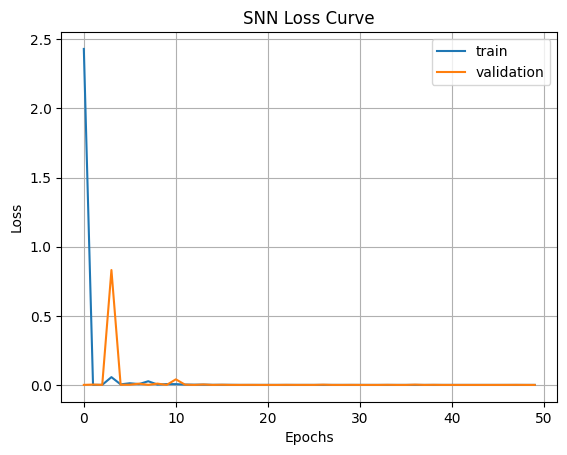

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Define the SNN architecture
def build_snn_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))  # Input layer with 64 neurons
    model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
    model.add(Dense(16, activation='relu'))  # Hidden layer with 16 neurons
    model.add(Dense(1))  # Output layer (no activation for regression)
    return model

# Step 2: Compile the model
snn_model = build_snn_model(X_train.shape[1])
snn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Step 3: Train the model
history = snn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Step 4: Make predictions
y_pred_snn = snn_model.predict(X_test)

# Ensure y_pred_snn is a 1D array by flattening it
y_pred_snn = y_pred_snn.ravel()

# Step 5: Evaluate the model using the pre-defined metrics
mape_value_snn = mean_absolute_percentage_error(y_test.values, y_pred_snn)
smape_value_snn = symmetric_mean_absolute_percentage_error(y_test.values, y_pred_snn)
mbe_value_snn = mean_bias_error(y_test.values, y_pred_snn)
mae_value_snn = mean_absolute_error(y_test.values, y_pred_snn)
rmse_value_snn = root_mean_squared_error(y_test.values, y_pred_snn)
r2_value_snn = r_squared(y_test.values, y_pred_snn)

# Print the results
print(f"MAPE (SNN): {mape_value_snn:.2f}%")
print(f"SMAPE (SNN): {smape_value_snn:.2f}%")
print(f"MBE (SNN): {mbe_value_snn:.2f}")
print(f"MAE (SNN): {mae_value_snn:.2f}")
print(f"RMSE (SNN): {rmse_value_snn:.2f}")
print(f"R² (SNN): {r2_value_snn:.2f}")

# Step 6: Plot the loss curve for visualization
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('SNN Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


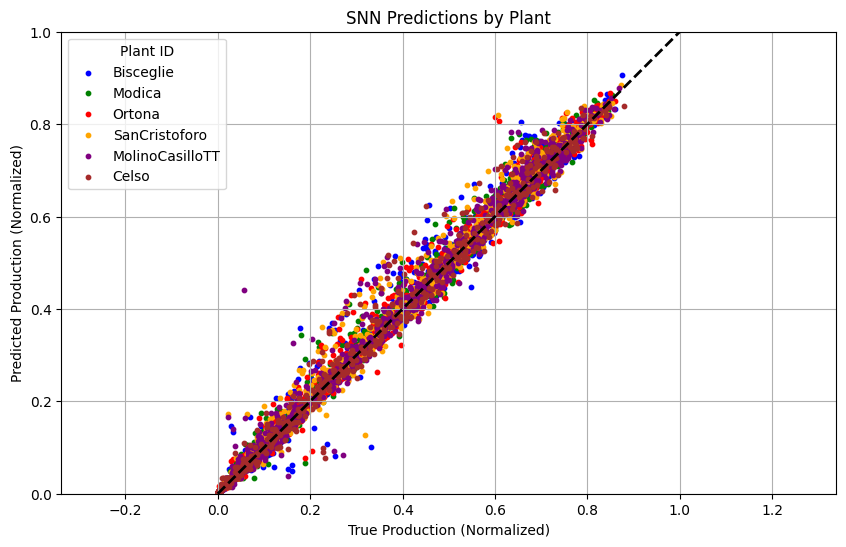

In [42]:
import matplotlib.pyplot as plt

# Ensure y_pred_snn is a pandas Series if it's a NumPy array
if isinstance(y_pred_snn, np.ndarray):
    y_pred_snn = pd.Series(y_pred_snn)

# Reset index for y_test and X_test to ensure they align
y_test = y_test.reset_index(drop=True)
X_test_with_pID = X_test.copy().reset_index(drop=True)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Define colors for each plant (same color scheme as before)
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot for the SNN model
plt.figure(figsize=(10, 6))

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred_snn[plant_mask].values, s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('SNN Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)  # Optional: add grid for better visibility
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Optional: diagonal line for reference
plt.axis('equal')  # Optional: make axes equal for better visual comparison
plt.xlim(0, 1)  # Adjust limits based on your normalized data range
plt.ylim(0, 1)  # Adjust limits based on your normalized data range
plt.show()


# RNN

In [43]:
# Reshape input data to 3D for RNN: (samples, time_steps, features)
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))


In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the RNN model with LSTM layers
rnn_model = Sequential()

# Add an LSTM layer with 50 units
rnn_model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Add an output layer
rnn_model.add(Dense(1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')


In [45]:
# Train the model
rnn_model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))


Epoch 1/20
1401/1401 [==============================] - 2s 903us/step - loss: 0.9107 - val_loss: 0.0040
Epoch 2/20
1401/1401 [==============================] - 1s 745us/step - loss: 0.0017 - val_loss: 5.5384e-04
Epoch 3/20
1401/1401 [==============================] - 1s 758us/step - loss: 7.8387e-04 - val_loss: 5.4008e-04
Epoch 4/20
1401/1401 [==============================] - 1s 725us/step - loss: 6.3345e-04 - val_loss: 6.1767e-04
Epoch 5/20
1401/1401 [==============================] - 1s 715us/step - loss: 6.4831e-04 - val_loss: 0.0013
Epoch 6/20
1401/1401 [==============================] - 1s 747us/step - loss: 0.0020 - val_loss: 0.0018
Epoch 7/20
1401/1401 [==============================] - 1s 716us/step - loss: 9.1860e-04 - val_loss: 0.0010
Epoch 8/20
1401/1401 [==============================] - 1s 713us/step - loss: 0.0014 - val_loss: 0.0013
Epoch 9/20
1401/1401 [==============================] - 1s 731us/step - loss: 0.0016 - val_loss: 0.0013
Epoch 10/20
1401/1401 [=============

In [48]:
# Make predictions on the test set
y_pred_rnn = rnn_model.predict(X_test_reshaped)

# Flatten the predictions to a 1D array
y_pred_rnn = y_pred_rnn.ravel()

# Evaluate the RNN model
mape_rnn = mean_absolute_percentage_error(y_test.values, y_pred_rnn)
smape_rnn = symmetric_mean_absolute_percentage_error(y_test.values, y_pred_rnn)
mbe_rnn = mean_bias_error(y_test.values, y_pred_rnn)
mae_rnn = mean_absolute_error(y_test.values, y_pred_rnn)
rmse_rnn = root_mean_squared_error(y_test.values, y_pred_rnn)
r2_rnn = r_squared(y_test.values, y_pred_rnn)

# Print the evaluation results
print(f"RNN MAPE: {mape_rnn:.2f}%")
print(f"RNN SMAPE: {smape_rnn:.2f}%")
print(f"RNN MBE: {mbe_rnn:.2f}")
print(f"RNN MAE: {mae_rnn:.2f}")
print(f"RNN RMSE: {rmse_rnn:.2f}")
print(f"RNN R²: {r2_rnn:.2f}")


351/351 [==============================] - 0s 526us/step
RNN MAPE: 899.49%
RNN SMAPE: 105.51%
RNN MBE: -0.01
RNN MAE: 0.01
RNN RMSE: 0.02
RNN R²: 0.99


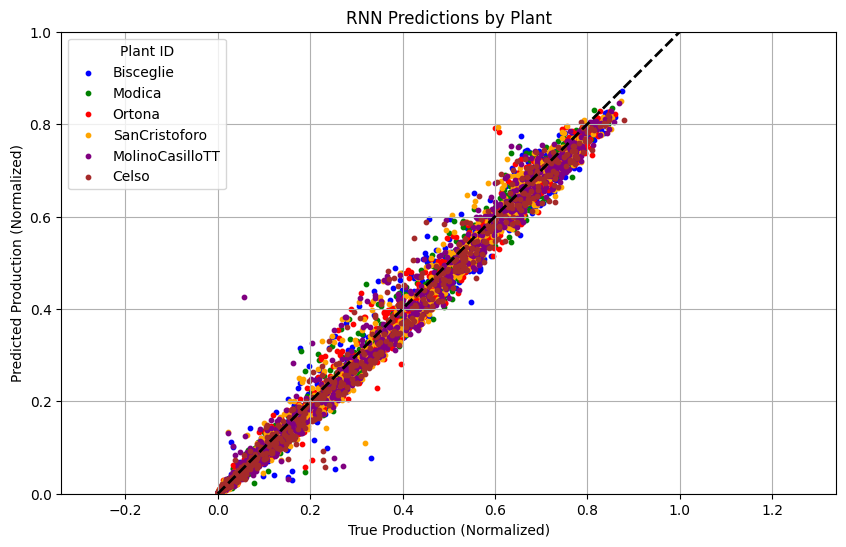

In [49]:
import matplotlib.pyplot as plt

# Reset index for X_test and y_test to ensure they align
X_test_with_pID = X_test.copy().reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# If y_pred_rnn is a NumPy array, convert it to a pandas Series for compatibility
if isinstance(y_pred_rnn, np.ndarray):
    y_pred_rnn = pd.Series(y_pred_rnn)

# Map 'pID' from df to X_test using their corresponding rows
X_test_with_pID['pID'] = df.loc[X_test.index, 'pID'].reset_index(drop=True)

# Define colors for each plant
colors = {
    'Bisceglie': 'blue',
    'Modica': 'green',
    'Ortona': 'red',
    'SanCristoforo': 'orange',
    'MolinoCasilloTT': 'purple',
    'Celso': 'brown'
}

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot predictions for each plant
for plant, color in colors.items():
    plant_mask = X_test_with_pID['pID'] == plant  # Filter for each plant
    plt.scatter(y_test[plant_mask].values, y_pred_rnn[plant_mask].values, s=10, color=color, label=plant)

# Add labels, title, and legend
plt.xlabel('True Production (Normalized)')
plt.ylabel('Predicted Production (Normalized)')
plt.title('RNN Predictions by Plant')
plt.legend(title='Plant ID')
plt.grid(True)  # Optional: add grid for better visibility
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Optional: diagonal line for reference
plt.axis('equal')  # Optional: make axes equal for better visual comparison
plt.xlim(0, 1)  # Adjust limits based on your normalized data range
plt.ylim(0, 1)  # Adjust limits based on your normalized data range
plt.show()


# Transformer

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

# Data Preprocessing (for Transformer input)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Reshape inputs for Transformer: (batch_size, sequence_length, input_size)
# Assuming sequence length = 1 for single-step forecasting
X_train_tensor = X_train_tensor.unsqueeze(1)  
X_test_tensor = X_test_tensor.unsqueeze(1)  

# Transformer model definition
class TransformerModel(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size, num_layers, num_heads, dropout=0.1):
        super(TransformerModel, self).__init__()
        
        self.transformer = nn.Transformer(
            d_model=hidden_dim, 
            nhead=num_heads, 
            num_encoder_layers=num_layers, 
            num_decoder_layers=num_layers, 
            dropout=dropout
        )
        
        self.input_fc = nn.Linear(input_size, hidden_dim)  # Input layer to match transformer input
        self.output_fc = nn.Linear(hidden_dim, output_size)  # Output layer for regression
        
    def forward(self, src):
        src = self.input_fc(src)
        transformer_out = self.transformer(src, src)
        output = self.output_fc(transformer_out)
        return output.squeeze(1)  # Remove unnecessary dimension

# Define model parameters
input_size = X_train.shape[1]  # Number of input features
hidden_dim = 64  # Size of transformer model
output_size = 1  # Predicting a single output (PV production)
num_layers = 3  # Number of transformer layers
num_heads = 4  # Number of attention heads

# Initialize the Transformer model
transformer_model = TransformerModel(input_size, hidden_dim, output_size, num_layers, num_heads)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(transformer_model.parameters(), lr=0.001)

# Training loop
epochs = 100
for epoch in range(epochs):
    transformer_model.train()  # Set model to training mode
    
    optimizer.zero_grad()  # Clear gradients
    
    output = transformer_model(X_train_tensor)  # Forward pass
    loss = criterion(output, y_train_tensor)  # Compute loss
    
    loss.backward()  # Backpropagate loss
    optimizer.step()  # Update weights
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Testing the model
transformer_model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred_test = transformer_model(X_test_tensor)
    y_pred_test = y_pred_test.numpy()  # Convert predictions to NumPy array for evaluation

# Evaluation using your predefined metrics
mape_value = mean_absolute_percentage_error(y_test_tensor.numpy(), y_pred_test)
smape_value = symmetric_mean_absolute_percentage_error(y_test_tensor.numpy(), y_pred_test)
mbe_value = mean_bias_error(y_test_tensor.numpy(), y_pred_test)
mae_value = mean_absolute_error(y_test_tensor.numpy(), y_pred_test)
rmse_value = root_mean_squared_error(y_test_tensor.numpy(), y_pred_test)
r2_value = r_squared(y_test_tensor.numpy(), y_pred_test)

# Print results
print(f"MAPE: {mape_value:.2f}%")
print(f"SMAPE: {smape_value:.2f}%")
print(f"MBE: {mbe_value:.2f}")
print(f"MAE: {mae_value:.2f}")
print(f"RMSE: {rmse_value:.2f}")
print(f"R²: {r2_value:.2f}")


/Users/shilpasrinivasareddy/Library/Python/3.9/lib/python/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
